In [1]:
import os

# Demerdez-vous pour installer openslide sur votre machine
OPENSLIDE_PATH = r"D:\DataManage\openslide-win64-20231011\bin"
if hasattr(os, "add_dll_directory"):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

from display_wsi import display_wsi_results
from extract_tiles import filter_whites
from extract_features import extract_features
from get_neo_preds import get_neo_preds
from get_comp_preds import get_comp_preds

from pathlib import Path
from torch import device
import matplotlib.pyplot as plt
import numpy as np

In [2]:
WSI_PATH = Path(r"D:\package_neo\tests\XXX051-17_FADJ02_HESbch.svs")
TEMP_PATH = Path(r"D:\package_neo\tests\temp")
DEVICE = device("cuda")  # or device("cpu")
NEO_PATH = Path(r"D:\package_neo\src\models\model_neo.pth")
COMP_PATH = Path(r"D:\package_neo\src\models\model_comp_BASAL_CLASSIC_only.pth")
BATCH_SIZE = 64

In [3]:
slidename = WSI_PATH.stem
tiles_coord = filter_whites(WSI_PATH, TEMP_PATH)

100%|██████████| 24696/24696 [00:00<00:00, 81676.62it/s]

Finished process for slide XXX051-17_FADJ02_HESbch
Exported tiles coordinates to D:\package_neo\tests\temp\XXX051-17_FADJ02_HESbch\tiles_coord.npy


In [4]:
features = extract_features(
    WSI_PATH,
    DEVICE,
    BATCH_SIZE,
    tiles_coords=tiles_coord,
    # tiles_coords_path=TEMP_PATH / f"{slidename} / tiles_coords.npy",
)
PATH_FEATURES = TEMP_PATH / f"{slidename}" / "features.npy"
np.save(PATH_FEATURES, features)

In [5]:
pred_neo = get_neo_preds(slidename, NEO_PATH, TEMP_PATH, DEVICE, PATH_FEATURES=PATH_FEATURES)

In [6]:
pred_comp_wsi, pred_comp_tiles = get_comp_preds(slidename, COMP_PATH, TEMP_PATH, DEVICE, PATH_FEATURES=PATH_FEATURES)

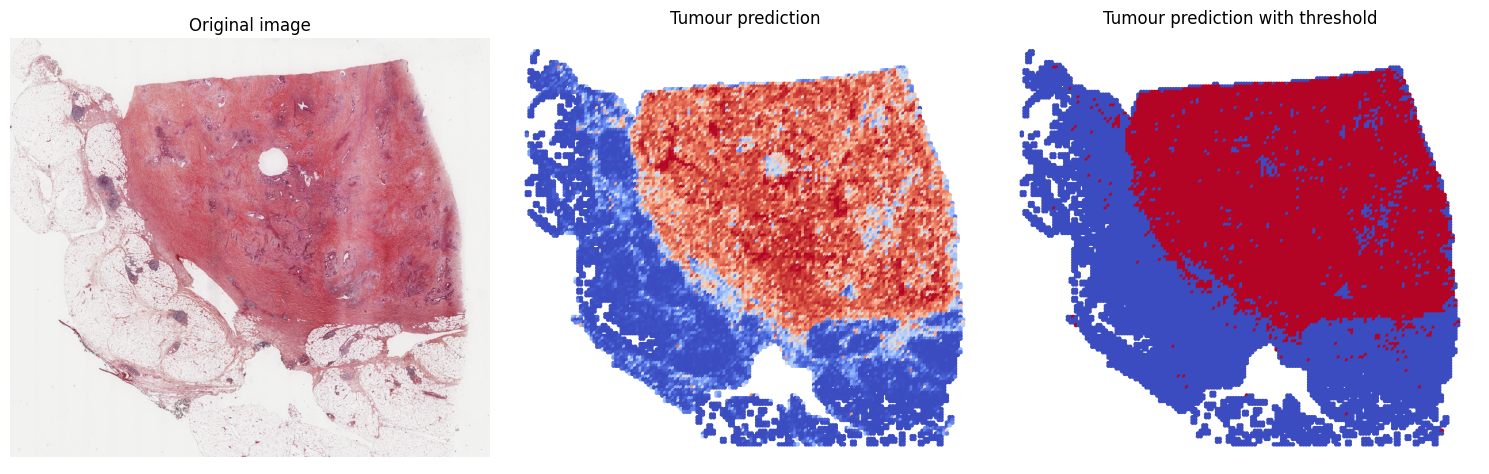

In [7]:
display_wsi_results(
    WSI_PATH,
    pred_neo=pred_neo,
    # pred_comp=pred_comp_tiles,
    thresh=0.5,
)